## Artificial Intelligence
## L2 International, Univ. Bordeaux

### Lab #2, Unsupervised Learning (3)

In this lab, we will consider hierarchical clustering.

This lab is an adaptation of:

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

### Example 1. An introduction

In this first example, we will simply use a small dataset: a set of points that we define manually.

1. Execute the following code.

In [1]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

2. Let's plot the above data points. To do so, execute the following code:

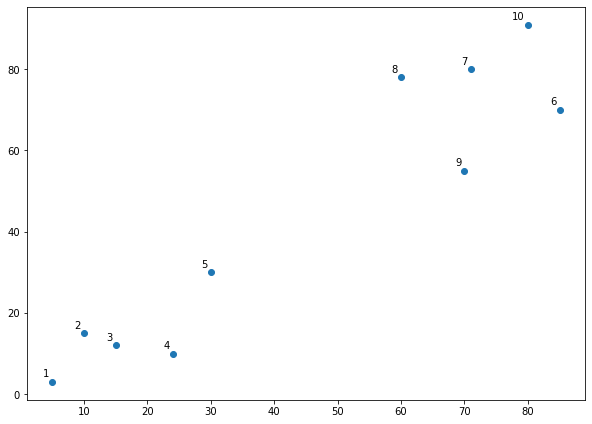

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

We can observe that the data points form two clusters: one at the bottom left consisting of points 1-5 while second at the top right consisting of points 6-10.

**Dendrogram (see https://en.wikipedia.org/wiki/Dendrogram for more information).**

A dendogram is diagram with a tree structure. It is used to divide into multiple clusters depending upon the problem. We first execute the following code so we can observe how this tool can be used to get an idea on how our data can be clustered.

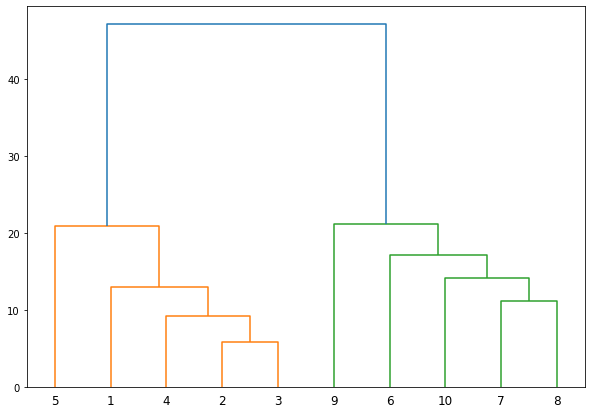

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')
labelList = range(1,11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
          orientation='top',
          labels=labelList,
          distance_sort='descending',
          show_leaf_counts=True)
plt.show()

The algorithm starts by finding the two points that are closest to each other on the basis of Euclidean distance. We can see that the dendograms have been created joining points 2 with 3, and 8 with 7. The next step is to join the cluster formed by joining two points to the next nearest cluster or point which in turn results in another cluster. This process continues until all the points are joined together to form one big cluster.

Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters.

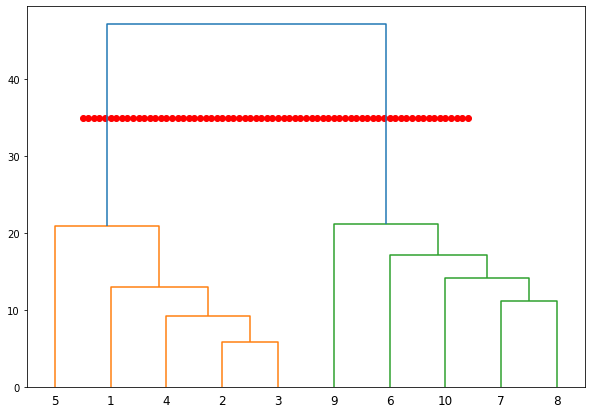

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked=linkage(X, 'single')
labelList = range(1,11)
plt.figure(figsize=(10,7))
dendrogram(linked, 
           orientation='top',
          labels=labelList,
          distance_sort='descending',
          show_leaf_counts=True)
hline = np.array([[x, 35] for x in range(10, 80)])
plt.scatter(hline[:,0], hline[:, 1], color='red')
plt.show()

We can see that the largest vertical distance without any horizontal line passing through it is represented by blue line. So we draw a new horizontal red line that passes through the blue line. Since it crosses the blue line at two points, therefore the number of clusters will be 2.

If we draw another line further down, we get more clusters:

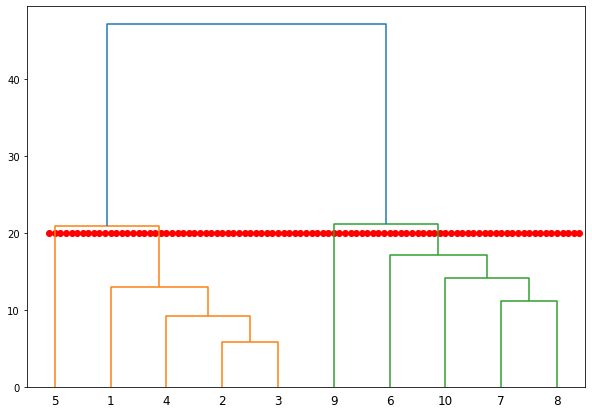

In [5]:
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
hline = np.array([[x,20] for x in range(4,100)])
plt.scatter(hline[:,0], hline[:,1], color='red')
plt.show()

In the above plot, the horizontal line passes through four vertical lines resulting in four clusters: cluster of points 6,7,8 and 10, cluster of points 3,2,4 and 1 and points 9 and 5 will be treated as single point clusters.

**Hierarchical Clustering using sklearn**

As for $k$-means, the steps are somehow the same. We first instantiate the model that we train it on training dataset, in our case, we will just the $X$ data we generated before:

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 3, 2, 0, 0, 2, 0], dtype=int64)

In the code above we import the AgglomerativeClustering class from the "sklearn.cluster" library. The number of parameters is set to 2 using the n_clusters parameter while the affinity is set to "euclidean" (distance between the datapoints).

In [8]:
print(cluster.labels_)

[1 1 1 1 3 2 0 0 2 0]


The output is a one-dimensional array of 10 elements corresponding to the clusters assigned to our 10 data points.

As expected the first five points have been clustered together while the last five points have been clustered together. It is important to mention here that these ones and zeros are merely labels assigned to the clusters and have no mathematical implications.

Finally, let's plot our clusters. To do so, execute the following code:

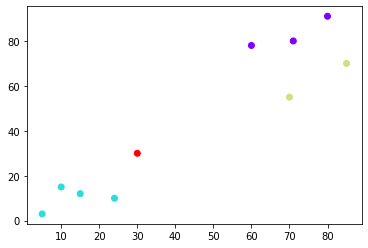

In [9]:
plt.scatter(X[:, 0], X[:,1], c=cluster.labels_, cmap='rainbow')

We can see points in two clusters where the first five points clustered together and the last five points clustered together.

#### Example 2. Hierarchical Clustering on Real Data

In the previous example, we performed hierarchical clustering on dummy data. In this example, we will perform hierarchical clustering on real-world data and see how it can be used to solve an actual problem.

The problem that we are going to solve in this example is to segment customers into different groups based on their shopping trends.

1. We first import the necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

2. Then, we load the data:

In [2]:
custom_data = pd.read_csv('https://www.labri.fr/~zemmari/datasets/shopping-data.csv')
custom_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
custom_data.shape

(200, 5)

Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender. Execute the following script to filter the first three columns from our dataset:

In [5]:
data=custom_data[['Annual Income (k$)', 'Spending Score (1-100)']]
print(data.shape)
data.head()

(200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Next, we need to know the clusters that we want our data to be split to. We will again use the scipy library to create the dendrograms for our dataset. Execute the following script to do so:

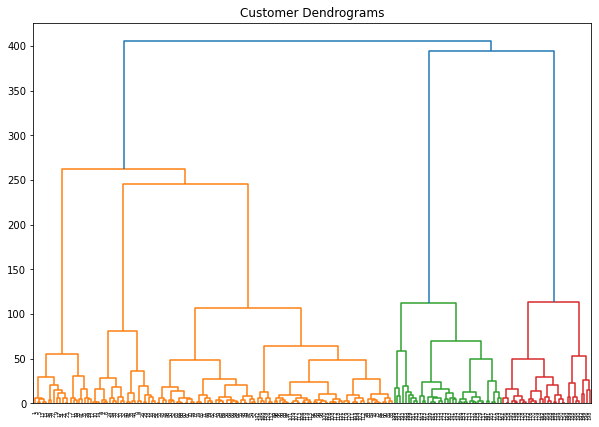

In [7]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 5 clusters as shown in the figure obtained by the following code:

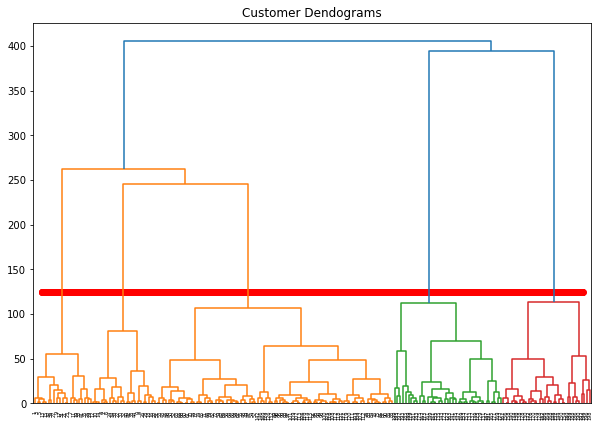

In [8]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
hline = np.array([[x, 125] for x in range(30, 1970)])
plt.scatter(hline[:, 0], hline[:, 1], color='red')

Now we know the number of clusters for our dataset, the next step is to group the data points into these five clusters. To do so we will again use the AgglomerativeClustering class of the sklearn.cluster library.

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage = 'ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

You can see the cluster labels from all of your data points. Since we had five clusters, we have five labels in the output i.e. 0 to 4.

As a final step, let's plot the clusters to see how actually our data has been clustered:

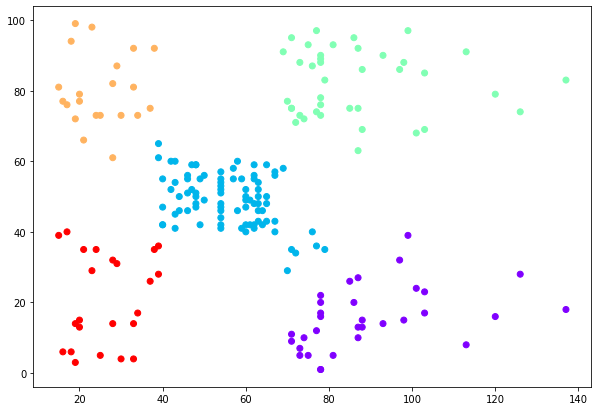

In [10]:
plt.figure(figsize=(10, 7))
data=data.values
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap='rainbow')

$Interpretation:$

We can see the data points in the form of five clusters. The data points in the bottom right belong to the customers with high salaries but low spending. These are the customers that spend their money carefully. Similarly, the customers at top right (green data points), these are the customers with high salaries and high spending. These are the type of customers that companies target. The customers in the middle (blue data points) are the ones with average income and average salaries. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers, etc.